# MATH 3350 Course Notes - Module S6 

## Confidence Intervals

A statistic from a sample is a **_point estimate_** of some population parameter.  

For example, $\overline{x}$ from a sample is a point estimate for $\mu$ in the population from which it was drawn.

We don't expect the point estimate to be exactly correct, but we expect it to be somewhere near the true parameter. We can use the sample to create a _range_ of values that is likely to contain the true parameter. This range of values is called a **_confidence interval_**. 

### Ways to Express a Confidence Interval

Confidence intervals can be expressed in the form $[a,b]$ (lower and upper bounds) or $e \pm m$ (estimate $\pm$ margin of error).  The table below contains examples, where each row gives equivalent confidence intervals, one in each form.  

Example # | $[a,b]$ | $e \pm m$
----------|---------|---------
1) | $[3,7]$ | $5 \pm 2$
2) | $[-2.5,3]$ | $0.25 \pm 2.75$
3) | $[0.2,1.4]$ | $0.8 \pm 0.6$
4) | $[-8.25,-0.75]$ | $-4.5 \pm 3.75$

### Elements of a Confidence Interval
A confidence interval has the following elements:  
* A confidence level
* A point estimate 
* A margin of error

#### Confidence Level 
The confidence level indicates the probability the procedure used to generate the interval will result in an interval that contains the true parameter value. (_See examples under the Sampling Distribution options in StatKey_.)

#### Point Estimate
The point estimate is at the center of the interval, as in the $e \pm m$ format, where $e$ is the point estimate.

#### Margin of Error
The margin of error is the distance above/below the estimate that defines the upper and lower bounds of the interval.  

Some facts about the margin of error, $m$: 
* $m$ depends on the confidence level 
* $m$ depends on the variability of the sample
* $m$ is computed differently for empirical and theoretical intervals


## Empirical Confidence Intervals: Bootstrapping

When we only have one sample, we can treat the sample as a "microcosm" of the entire population and generate **_bootstrap samples_** by sampling from the original sample _with replacement_.  Each bootstrap sample will have its own sample statistic.  The statistics from those bootstrap samples form a distribution that can be used as the basis for a confidence interval.  A 95% confidence interval would be the _middle_ 95% of that distribution. (_See examples under the bootstrap options in StatKey._)  

The diagram below illustrates the bootstrap process.



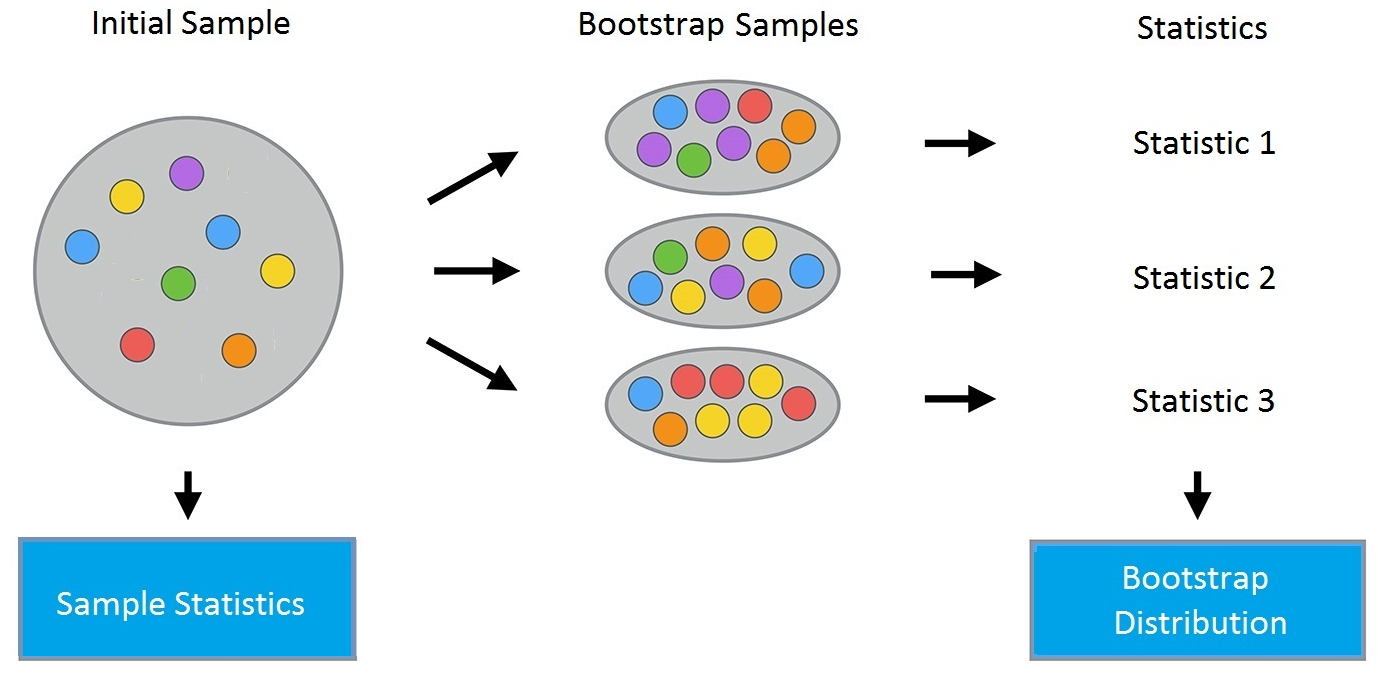

## Theoretical Confidence Intervals

Theoretical confidence intervals are closely related to 2-tailed hypothesis tests using the appropriate distribution for the parameter of interest.  For example, the $t$ distributions are used to construct confidence intervals for a mean($\mu$).  The _z_ and $\chi^{2}$ distributions are used to construct confidence intervals for a proportion ($p$).  

In fact, recall that many of R's built-in statistical tests provide a confidence interval as part of the test output.

#### How the Distribution Helps Compute the Margin of Error

Recall the property of normal distributions that 95% of values in the distribution lie within ~2 standard deviations of the mean.  _NOTE: A more precise value is 1.96 standard deviations._ The plot below illustrates this property.

In [ ]:
#Create plot of a Normal distribution with symmetric boundaries for 95%
xvalues <- seq(-3,3,0.1)       # Generate x-values
z <- dnorm(xvalues)            # Normal Distribution y coordinates

plot (xvalues,z, main="Standard Normal Distribution", ylab="Density", xlab="z Statistic", 
      type="l", lwd=4)
abline(v=1.96,col="red", lty=2)
abline(v=-1.96,col="red", lty=2)

Based on this property, we can take an estimate $e$ from a Normal **sampling distribution** and make 1.96 standard deviations of that distribution our margin of error $m$.  Then the interval $e \pm m$ would contain the true mean 95% of the time.  

_Remember that the standard deviation of a sampling distribution is called the standard error, and is computed by $\frac {\sigma}{\sqrt{n}}$_, where $n$ is the size of the samples and $\sigma$ is the underlying population standard deviation. So theoretically, a 95% confidence interval could be conducted from a sample of size $n$ as:

<center>
$\overline{x} \pm 1.96 \left (\frac{\sigma}{\sqrt{n}} \right )$
</center>

For a different confidence level, we need a different z.  We could find the z corresponding to our confidence level as shown below.  

Note this z 'cutoff' is called $z^{*}$, the 'critical z' value. 

In [ ]:
# Find critical z for a given confidence level
C <- 0.90    #Try changing this and see what z value you get

outer <- 1 - C  #This is the proportion of the distribution outside the boundary
left_tail <- outer/2 #Half is on the left, and half is on the right
right_tail <- 1 - left_tail  #Notice each cutoff is a percentile 

cat("Confidence level", C, "uses region between", left_tail, "and", right_tail, "percentile boundaries\n" )

#This is the z* value for given confidence level
critical_z_neg <- qnorm(left_tail)  
critical_z_pos <- qnorm(right_tail)

cat("Critical z* values:", critical_z_pos, "and", critical_z_neg, "\n")


In [ ]:
#Redo plot with symmetric boundaries for new confidence level
xvalues <- seq(-3,3,0.1)       # Generate x-values
z <- dnorm(xvalues)            # Normal Distribution y coordinates

plot (xvalues,z, main="Standard Normal Distribution", ylab="Density", xlab="z Statistic", 
      type="l", lwd=4)
abline(v=critical_z_neg,col="red", lty=2)
abline(v=critical_z_pos,col="red", lty=2)

So our general formula for the confidence interval for a mean would be:


<center>
$\overline{x} \pm z^{*} \left (\frac{\sigma}{\sqrt{n}} \right )$
</center>

**The catch?**  We don't know the value of $\sigma$, the true standard deviation in the population.  As before, we'll need to rely on the $t$ distributions instead.  We still define our degrees of freedom based on the sample size. But otherwise, the process mirrors the one above.  We just need a critical t value ($t^{*}$) instead.


<center>
$\overline{x} \pm t^{*} \left (\frac{s}{\sqrt{n}} \right )$
</center>

Below is an example.

In [ ]:
#Create plot of a t distribution with symmetric boundaries 
C <- 0.90                      #Set to desired confidence level
N <- 20                        # Set to desired sample size

t_df <- N - 1

xvalues <- seq(-4,4,0.1)             # Generate x-values
tvalues <- dt(xvalues, df=t_df)      # t Distribution y coordinates for designated df 

# Find critical t for given confidence level
outer <- 1 - C      #This is the proportion of the distribution outside the boundary
right_tail <- 1 - outer/2 #Half on the right will give us the positive t*

critical_t <- qt(right_tail, df=t_df)  #This is the t* value for given confidence level

cat("t* is ", critical_t)

title <- paste("t Distribution, df=", t_df)
plot (xvalues,tvalues, main=title, ylab="Density", xlab="t Statistic", 
      type="l", lwd=4)
abline(v=critical_t, lty=2, col="red")
abline(v=-critical_t, lty=2, col="red")

### Example 1.  Flight Delays (Mean)

We'll load the _united.csv_ dataset and use the values to construct a confidence interval. The data set contains data on several United Airlines flights over one summer.  We want a confidence interval of the mean delay (in minutes) of all United flights.



In [ ]:
flights <- read.csv("united.csv")

#Have a look at format of data set
head(flights,3)

#### Calculating Theoretical Confidence Interval (Option A)

Below we calculate the confidence interval by formula.

In [ ]:
#Calculating confidence interval for a mean

C <- 0.9                         #Confidence level
N <- length(flights$Delay)       #Sample size
t_df <- N - 1                    #Degrees of freedom
boundary <- 1 - (1-C)/2          #Distribution cutoff (right tail) for given confidence level
tstar <- qt(boundary, df=t_df)   #Critical t value

estimate <- mean(flights$Delay)  #Point estimate from this sample
margin <- tstar * sd(flights$Delay)/sqrt(N)
cat (estimate, "+/-", margin, "\n")

lower <- estimate - margin
upper <- estimate + margin
cat ("[", lower, ",", upper, "]")



#### Another Option 
Running R's packaged t-test will also give us a confidence interval for the mean of the data. 


In [ ]:
#Use R's t.test function
# t.test(x, mu = 0, alternative = "two.sided")
t.test(flights$Delay, conf.level=C)

##### Using a Confidence Interval as Basis for 2-Tailed Hypothesis Test

Because the confidence interval is constructed with 2-tailed $t^{*}$ values, it aligns with a **2-sided** hypothesis test using significance level $\alpha = 1 - C$

Suppose we are testing the hypothesis that the mean flight delay is NOT 15 minutes: 

<center>
$H_{0}: \mu = 15$  
</center>
<center>
$H_{a}: \mu \ne 15$
</center>

If our confidence level is 90%, we can examine the interval $[16.1058, 17.2105]$ and find that 15 is **_not in the interval_**.  Therefore, at $\alpha = 0.1$, we can reject $H_0$ and conclude there is evidence that the mean delay is not 15 minutes.

## Other Confidence Intervals

### Intervals with t-Statistic

Other confidence intervals using the t-statistic mirror the t-statistic calculation and degrees of freedom from the t-test corresponding with the given scenario.  The general format of the interval is:  

<center>
$e \pm t^{*}(SE)$
</center>

where $e$ refers to the point estimate from the sample, and $SE$ is the standard error for that statistic.   The standard error will depend on the scenario (e.g., whether or not we are pooling variance in when computing difference in means.)  

#### Difference Between Two Means (Pooled Variance)
A confidence interval for difference in means using pooled variance $S^{2}$ would be constructed as follows:

<center>
$(\overline{x}_1 - \overline{x}_2) \pm t^{*}\sqrt{\frac{S^{2}}{n_1}+\frac{S^{2}}{n_2}}$
</center>

where $n_1$ and $n_2$ are sample sizes of the two groups being compared. The degrees of freedom for the **Student $t$-statistic** would be used to find $t^{*}$. 


#### Difference Between Two Means (Un-pooled Variance)
A confidence interval for difference in means using un-pooled variances $s_1^{2}$ and $s_2^{2}$ would be constructed as follows:

<center>
$(\overline{x}_1 - \overline{x}_2) \pm t^{*}\sqrt{\frac{s_1^{2}}{n_1}+\frac{s_2^{2}}{n_2}}$
</center>

where $n_1$ and $n_2$ are sample sizes of the two groups being compared. The degrees of freedom for the **Welch $t$-statistic** would be used to find $t^{*}$.  

Below are examples of R's confidence intervals for difference between means. They are based on the difference in horsepower between cars with automatic (coded as 0) and manual (coded as 1) transmissions in the mtcars data set, as shown below.



In [ ]:
boxplot(hp ~ factor(am), horizontal=TRUE, data=mtcars)

In [ ]:
#Difference between means, pooled variance
automatic <- mtcars$hp[mtcars$am == 0]
manual <- mtcars$hp[mtcars$am == 1]

tt <- t.test(automatic,manual, var.equal=TRUE)
tt$conf.int

In [ ]:
#Difference between means, un-pooled variance

tt <- t.test(automatic,manual, var.equal=FALSE)
tt$conf.int

Note that when variances are approximately equal, the results obtain from using pooled and un-pooled techniques are extremely similar, as shown below for the test of differences in sepal width between two species.

In [ ]:
#Difference between means, un-pooled variance
virginica <- iris$Sepal.Width[iris$Species == "virginica"]
versicolor <- iris$Sepal.Width[iris$Species == "versicolor"]

tt <- t.test(virginica,versicolor, var.equal=TRUE)
tt$conf.int

In [ ]:
#Difference between means, un-pooled variance

tt <- t.test(virginica,versicolor, var.equal=FALSE)
tt$conf.int


### Intervals with z-Statistic

Similarly, for confidence intervals involving proportions, _if the normal approximation is used_, the format is

<center>
$e \pm z^{*}(SE)$
</center>

where $e$ refers to the point estimate from the sample (such as $\widehat {p}$), and $SE$ is the standard error.  


#### Single Proportion
A confidence interval for a single proportion would be constructed as follows:

<center>
$\widehat{p} \pm z^{*}\sqrt{\frac{\widehat{p}(1-\widehat{p})}{n}}$
</center>

where $\widehat{p}$ is the sample proportion and $n$ is the sample size.

#### Difference Between Two Proportions 
A confidence interval for difference between proportions would be constructed as follows:

<center>
$(\widehat{p}_1 - \widehat{p}_2) \pm z^{*}\sqrt{\frac{\widehat{p}_1(1-\widehat{p}_1)}{n_1} + \frac{\widehat{p}_2(1-\widehat{p}_2)}{n_2}}$
</center>

where $\widehat{p}_1$ and $\widehat{p}_2$ are sample proportions from samples of size $n_1$ and $n_2$, respectively.  




#### R's Packaged Confidence Intervals for Proportions

Below are examples of R's packaged confidence intervals for proportions.  
**Remember: R does not use the normal approximation for proportions, so its results are based on a $\chi^{2}$ distribution**. Therefore, R's results will not match the z-test results exactly.  

In [ ]:
#A confidence interval in R for a single proportion (p-hat is 21/50)
pt <- prop.test(21,50)
pt

pt$conf.int

In [ ]:
#A confidence interval in R for difference between 2 proportions (p-hats are 21/50 and 37/53)
pt <- prop.test(x=c(21,37), n=c(50,53))
pt

pt$conf.int